In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

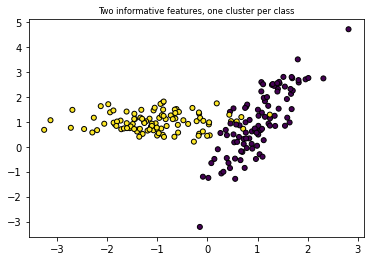

In [2]:
# First simulated data set
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()

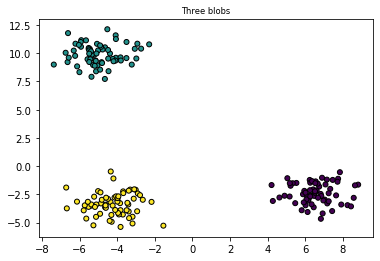

In [3]:
# Second simulated data set
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')
plt.show()

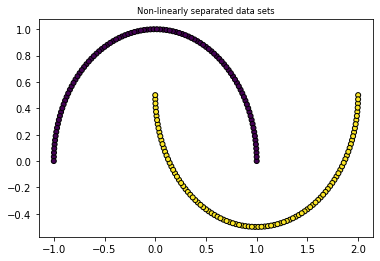

In [4]:
# Third simulated data set
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')
plt.show()

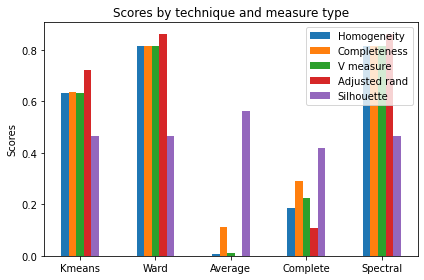

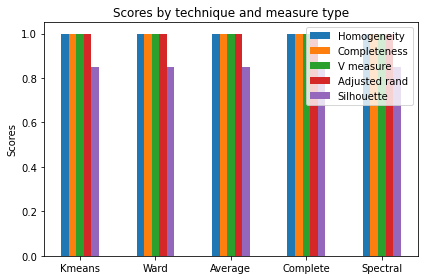

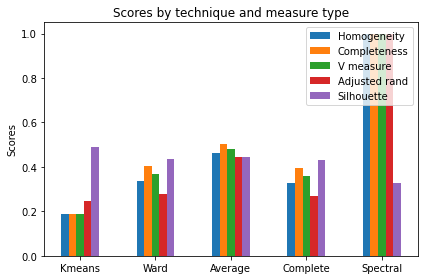

In [5]:
%%capture --no-display

data = [(X1, Y1, 2), (X2, Y2, 3), (X3, Y3, 2)]

for (X, Y, k) in data :
    
    homogeneity_means = []
    completeness_means = []
    v_measure_means = []
    adjusted_means = []
    silhouette_means = []

    # K-means
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10).fit(X)
    homogeneity_means.append(metrics.homogeneity_score(Y, km.labels_))
    completeness_means.append(metrics.completeness_score(Y, km.labels_))
    v_measure_means.append(metrics.v_measure_score(Y, km.labels_))
    adjusted_means.append(metrics.adjusted_rand_score(Y, km.labels_))
    silhouette_means.append(metrics.silhouette_score(X, km.labels_))

    # Hierarchical
    for linkage in ('ward', 'average', 'complete'):
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k).fit(X)
        homogeneity_means.append(metrics.homogeneity_score(Y, clustering.labels_))
        completeness_means.append(metrics.completeness_score(Y, clustering.labels_))
        v_measure_means.append(metrics.v_measure_score(Y, clustering.labels_))
        adjusted_means.append(metrics.adjusted_rand_score(Y, clustering.labels_))
        silhouette_means.append(metrics.silhouette_score(X, clustering.labels_))

    # Spectral
    spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors").fit(X)
    homogeneity_means.append(metrics.homogeneity_score(Y, spectral.labels_))
    completeness_means.append(metrics.completeness_score(Y, spectral.labels_))
    v_measure_means.append(metrics.v_measure_score(Y, spectral.labels_))
    adjusted_means.append(metrics.adjusted_rand_score(Y, spectral.labels_))
    silhouette_means.append(metrics.silhouette_score(X, spectral.labels_))

    # Plot
    labels = ['Kmeans', 'Ward', 'Average', 'Complete', 'Spectral']

    x = np.arange(len(labels)) 
    width = 0.10 

    fig, ax = plt.subplots()
    rects2 = ax.bar(x - 2*width, homogeneity_means, width, label='Homogeneity')
    rects3 = ax.bar(x - width , completeness_means, width, label='Completeness')
    rects4 = ax.bar(x , v_measure_means, width, label='V measure')
    rects5 = ax.bar(x + width, adjusted_means, width, label='Adjusted rand')
    rects6 = ax.bar(x + 2*width, silhouette_means, width, label='Silhouette')

    ax.set_ylabel('Scores')
    ax.set_title('Scores by technique and measure type')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc = 'upper right')
    fig.tight_layout()
    plt.show()

We can see that the results are quite different depending on the used method and data distribution. For the first distribution type, spectral clustering is overall the best method to use, even if all the other methods except average hierarchical clustering give decent results. For the second distribution type, all methods solve the problem without any error except spectral clustering which seems having trouble dealing with this type of distribution. For the last distribution type, spectral clustering is undoubtedly the best method as all the other ones give poor results.

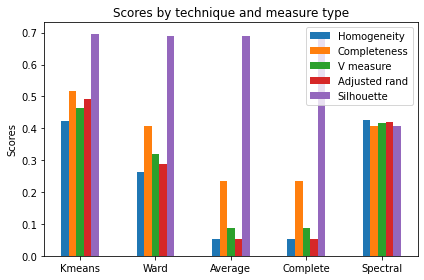

In [6]:
%%capture --no-display
 
data = pd.read_table('BreastDiagnostic.txt', sep=',',header=None)
X, Y, k = data.iloc[:, 2:], data.iloc[:, 1], 2

Y = Y.replace('M', 1)
Y = Y.replace('B', 0)

homogeneity_means = []
completeness_means = []
v_measure_means = []
adjusted_means = []
silhouette_means = []

# K-means
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10).fit(X)
homogeneity_means.append(metrics.homogeneity_score(Y, km.labels_))
completeness_means.append(metrics.completeness_score(Y, km.labels_))
v_measure_means.append(metrics.v_measure_score(Y, km.labels_))
adjusted_means.append(metrics.adjusted_rand_score(Y, km.labels_))
silhouette_means.append(metrics.silhouette_score(X, km.labels_))

# Hierarchical
for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k).fit(X)
    homogeneity_means.append(metrics.homogeneity_score(Y, clustering.labels_))
    completeness_means.append(metrics.completeness_score(Y, clustering.labels_))
    v_measure_means.append(metrics.v_measure_score(Y, clustering.labels_))
    adjusted_means.append(metrics.adjusted_rand_score(Y, clustering.labels_))
    silhouette_means.append(metrics.silhouette_score(X, clustering.labels_))

# Spectral
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors").fit(X)
homogeneity_means.append(metrics.homogeneity_score(Y, spectral.labels_))
completeness_means.append(metrics.completeness_score(Y, spectral.labels_))
v_measure_means.append(metrics.v_measure_score(Y, spectral.labels_))
adjusted_means.append(metrics.adjusted_rand_score(Y, spectral.labels_))
silhouette_means.append(metrics.silhouette_score(X, spectral.labels_))

# Plot
labels = ['Kmeans', 'Ward', 'Average', 'Complete', 'Spectral']

x = np.arange(len(labels))  
width = 0.10 

fig, ax = plt.subplots()
rects2 = ax.bar(x - 2*width, homogeneity_means, width, label='Homogeneity')
rects3 = ax.bar(x - width , completeness_means, width, label='Completeness')
rects4 = ax.bar(x , v_measure_means, width, label='V measure')
rects5 = ax.bar(x + width, adjusted_means, width, label='Adjusted rand')
rects6 = ax.bar(x + 2*width, silhouette_means, width, label='Silhouette')

ax.set_ylabel('Scores')
ax.set_title('Scores by technique and measure type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'upper right')
fig.tight_layout()
plt.show()

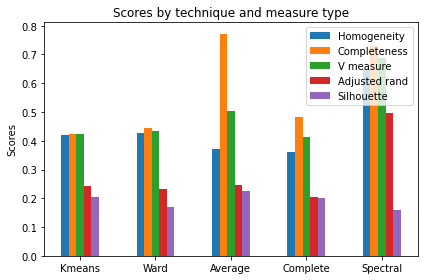

In [13]:
%%capture --no-display

data = pd.read_table('Mice.txt', sep='\t',header=None)
X, Y, k = data.iloc[1:, 2:-1], data.iloc[1:, -1], 8

pd.set_option("display.max_rows", 10, "display.max_columns", 10)

X = X.fillna(0)

X.iloc[:,76] = X.iloc[:,76].replace('Control',0)
X.iloc[:,76] = X.iloc[:,76].replace('Ts65Dn',1)
X.iloc[:,77] = X.iloc[:,77].replace('Memantine',0)
X.iloc[:,77] = X.iloc[:,77].replace('Saline',1)
X.iloc[:,78] = X.iloc[:,78].replace('C/S',0)
X.iloc[:,78] = X.iloc[:,78].replace('S/C',4)

print(X)

Y = Y.replace('c-CS-m', 1)
Y = Y.replace('c-SC-m', 2)
Y = Y.replace('c-CS-s', 3)
Y = Y.replace('c-SC-s', 4)
Y = Y.replace('t-CS-m', 5)
Y = Y.replace('t-SC-m', 6)
Y = Y.replace('t-CS-s', 7)
Y = Y.replace('t-SC-s', 8)

km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10).fit(X)
Y = pd.to_numeric(Y)
    
homogeneity_means = []
completeness_means = []
v_measure_means = []
adjusted_means = []
silhouette_means = []

# K-means
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10).fit(X)
homogeneity_means.append(metrics.homogeneity_score(Y, km.labels_))
completeness_means.append(metrics.completeness_score(Y, km.labels_))
v_measure_means.append(metrics.v_measure_score(Y, km.labels_))
adjusted_means.append(metrics.adjusted_rand_score(Y, km.labels_))
silhouette_means.append(metrics.silhouette_score(X, km.labels_))

# Hierarchical
for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k).fit(X)
    homogeneity_means.append(metrics.homogeneity_score(Y, clustering.labels_))
    completeness_means.append(metrics.completeness_score(Y, clustering.labels_))
    v_measure_means.append(metrics.v_measure_score(Y, clustering.labels_))
    adjusted_means.append(metrics.adjusted_rand_score(Y, clustering.labels_))
    silhouette_means.append(metrics.silhouette_score(X, clustering.labels_))

# Spectral
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors").fit(X)
homogeneity_means.append(metrics.homogeneity_score(Y, spectral.labels_))
completeness_means.append(metrics.completeness_score(Y, spectral.labels_))
v_measure_means.append(metrics.v_measure_score(Y, spectral.labels_))
adjusted_means.append(metrics.adjusted_rand_score(Y, spectral.labels_))
silhouette_means.append(metrics.silhouette_score(X, spectral.labels_))

# Plot
labels = ['Kmeans', 'Ward', 'Average', 'Complete', 'Spectral']

x = np.arange(len(labels))  
width = 0.10 

fig, ax = plt.subplots()
rects2 = ax.bar(x - 2*width, homogeneity_means, width, label='Homogeneity')
rects3 = ax.bar(x - width , completeness_means, width, label='Completeness')
rects4 = ax.bar(x , v_measure_means, width, label='V measure')
rects5 = ax.bar(x + width, adjusted_means, width, label='Adjusted rand')
rects6 = ax.bar(x + 2*width, silhouette_means, width, label='Silhouette')

ax.set_ylabel('Scores')
ax.set_title('Scores by technique and measure type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'upper right')
fig.tight_layout()
plt.show()

In [16]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(X)

               2            3            4            5            6   \
1     0.747193224    0.4301753   2.81632854  5.990151664  0.218830018   
2     0.689063548  0.411770344  2.789514042  5.685037861  0.211636155   
3     0.730246795  0.418308781  2.687201071  5.622058542  0.209010905   
4      0.61707615  0.358626307  2.466947197   4.97950319  0.222885842   
5     0.617429838  0.358802202   2.36578488  4.718678663  0.213105949   
6      0.62817583   0.36738809   2.38593897  4.807635435  0.218577766   
7     0.573695789  0.342708988  2.334223759  4.473130107  0.225172847   
8     0.564035627  0.327702703  2.260135135  4.268734644  0.214834152   
9     0.538428074  0.317720418  2.125725058  4.063950116  0.207221578   
10    0.499293643  0.362462159  2.096266398  3.598587286   0.22764884   
11    0.513277924  0.327792418  2.072572471   3.66105818  0.229474965   
12    0.499411072  0.355123675  2.006870828  3.466627405  0.216332941   
13    0.482101737  0.312539251  1.946200544  3.3495

# Conclusion 
The best method for breast cancer data seems to be the k-means algorithm. Spectral clustering gives similar results except for the silhouette score. Besides, average and complete hierarchical clustering give very poor results with this data.
For the mice dataset, spectral clustering gathers the best performances overall. Indeed, three criterias are the highest, another is the second best, while its silhouette score is low-average among the other ones. 